In [1]:
# with this project I wanted to run a classifier algo and determine if we can predict the player position with some features from the dataset
import pandas as pd
import numpy as np

data = pd.read_csv('../input/nba-player-stats/2021-2022 NBA Player Stats - Regular.csv',encoding="Windows-1252", delimiter=";")
data.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,304.501232,26.051724,36.704433,16.672414,18.265394,2.869951,6.386576,0.426235,0.871305,2.560591,...,0.658267,0.812931,2.519828,3.331650,1.808251,0.582759,0.353571,0.978695,1.564655,7.812438
std,172.637333,4.059640,25.899099,23.817195,9.648292,2.223988,4.651121,0.148525,0.841935,2.205642,...,0.283491,0.744196,1.790656,2.352818,1.838080,0.425452,0.360811,0.817941,0.826783,6.138077
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.750000,23.000000,12.000000,0.000000,10.500000,1.200000,3.000000,0.380750,0.200000,0.800000,...,0.600000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000
50%,300.500000,25.000000,36.500000,4.000000,17.500000,2.400000,5.150000,0.439500,0.700000,2.050000,...,0.750000,0.600000,2.300000,2.900000,1.200000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,459.000000,29.000000,61.000000,25.000000,25.725000,3.900000,8.725000,0.500000,1.400000,3.900000,...,0.838000,1.100000,3.400000,4.400000,2.400000,0.900000,0.500000,1.300000,2.200000,10.600000
max,605.000000,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000


In [2]:
data_drop = data[data['Tm']!='TOT']
data_drop

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [3]:
data_drop = data[data['Tm']!='TOT']
data_drop

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [4]:
data_drop2 = data_drop.drop(columns=['Tm', 'Rk', 'GS', 'FG', 'FGA', 'FTA', 'ORB', 'DRB'])
data_drop2

,Player,Pos,Age,G,MP,FG%,3P,3PA,3P%,2P,...,eFG%,FT,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,22,73,23.6,0.439,0.8,2.1,0.359,2.9,...,0.486,1.1,0.595,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,76,26.3,0.547,0.0,0.0,0.000,2.8,...,0.547,1.4,0.543,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,56,32.6,0.557,0.0,0.1,0.000,7.3,...,0.557,4.6,0.753,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,32,11.3,0.402,0.2,1.5,0.125,1.5,...,0.424,0.6,0.625,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,47,22.3,0.550,0.3,1.0,0.304,5.1,...,0.566,1.9,0.873,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,Thaddeus Young,PF,33,26,18.3,0.465,0.7,1.7,0.395,1.9,...,0.524,0.5,0.481,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,Trae Young,PG,23,76,34.9,0.460,3.1,8.0,0.382,6.3,...,0.536,6.6,0.904,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,Omer Yurtseven,C,23,56,12.6,0.526,0.0,0.2,0.091,2.3,...,0.528,0.7,0.623,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,Cody Zeller,C,29,27,13.1,0.567,0.0,0.1,0.000,1.9,...,0.567,1.4,0.776,4.6,0.8,0.3,0.2,0.7,2.1,5.2


<AxesSubplot:>

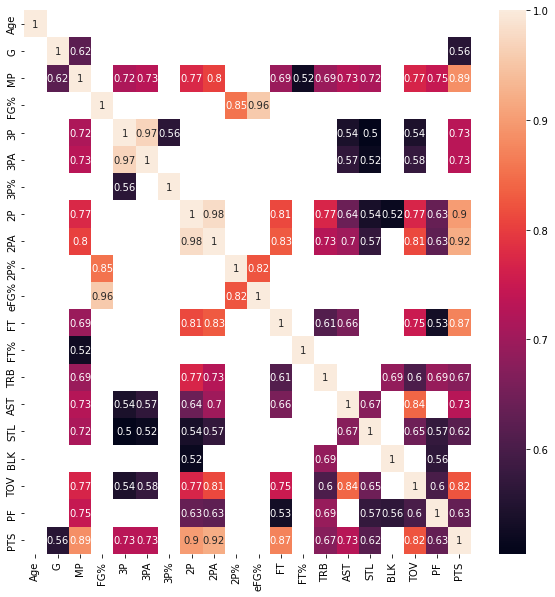

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))

corr = data_drop2.corr()
corr = corr[abs(corr) > 0.5]

sns.heatmap(corr, annot=True)

In [6]:
pos = pd.DataFrame(data_drop2.groupby('Pos').size())
pos = pos.reset_index()
pos

,Pos,0
0,C,118
1,PF,134
2,PG,138
3,SF,144
4,SG,181


In [7]:
points = data_drop2[['Pos', 'Age', 'G', '3P%', '2P%','eFG%', '2PA', '3PA', 'STL', 'AST', 'TOV', 'TRB', 'PTS']]
poin = pd.DataFrame(points.groupby('Pos').mean()) # look for average or max, min and so on 
poin = poin.reset_index()
poin

,Pos,Age,G,3P%,2P%,eFG%,2PA,3PA,STL,AST,TOV,TRB,PTS
0,C,26.728814,40.364407,0.199898,0.551915,0.541161,4.613559,1.005085,0.489831,1.208475,0.969492,5.364407,7.884746
1,PF,25.962687,38.164179,0.285888,0.519134,0.511231,3.994030,2.185075,0.525373,1.329104,0.890299,4.153731,7.953731
2,PG,26.326087,34.673913,0.283094,0.451964,0.469362,4.379710,3.179710,0.736957,3.374638,1.355797,2.512319,8.752174
3,SF,25.465278,35.687500,0.287861,0.475556,0.462194,3.463194,2.797222,0.570139,1.349306,0.824306,3.000694,7.452083
4,SG,25.491713,34.458564,0.294359,0.462702,0.467680,3.317127,3.295028,0.599448,1.780110,0.909945,2.395580,7.741436


In [8]:
pos_poin = pos.merge(poin, left_on = 'Pos', right_on = 'Pos', how = 'inner')
pos_poin2 = pos_poin.rename(columns = {0: 'Total Players'})
pos_point2 = pos_poin2.reset_index()
pos_poin2

,Pos,Total Players,Age,G,3P%,2P%,eFG%,2PA,3PA,STL,AST,TOV,TRB,PTS
0,C,118,26.728814,40.364407,0.199898,0.551915,0.541161,4.613559,1.005085,0.489831,1.208475,0.969492,5.364407,7.884746
1,PF,134,25.962687,38.164179,0.285888,0.519134,0.511231,3.994030,2.185075,0.525373,1.329104,0.890299,4.153731,7.953731
2,PG,138,26.326087,34.673913,0.283094,0.451964,0.469362,4.379710,3.179710,0.736957,3.374638,1.355797,2.512319,8.752174
3,SF,144,25.465278,35.687500,0.287861,0.475556,0.462194,3.463194,2.797222,0.570139,1.349306,0.824306,3.000694,7.452083
4,SG,181,25.491713,34.458564,0.294359,0.462702,0.467680,3.317127,3.295028,0.599448,1.780110,0.909945,2.395580,7.741436


In [9]:
new = points[(points['G']>25) & (points['PTS'] > 10)]
new

,Pos,Age,G,3P%,2P%,eFG%,2PA,3PA,STL,AST,TOV,TRB,PTS
2,C,24,56,0.000,0.562,0.557,12.9,0.1,1.4,3.4,2.6,10.1,19.1
4,C,36,47,0.304,0.578,0.566,8.8,1.0,0.3,0.9,0.9,5.5,12.9
6,SG,23,50,0.311,0.434,0.450,6.5,6.1,0.8,2.8,1.7,3.3,12.8
8,SG,26,66,0.409,0.533,0.588,2.7,5.9,0.7,1.5,0.7,3.4,11.1
9,C,23,56,0.100,0.688,0.678,9.6,0.2,0.8,1.6,1.7,10.8,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,SG,27,26,0.306,0.504,0.483,4.6,4.3,0.6,3.5,1.2,3.4,11.0
782,SF,26,73,0.393,0.513,0.543,8.5,5.5,1.0,2.2,1.5,4.5,17.2
797,C,26,68,0.390,0.570,0.576,8.0,4.9,0.8,2.3,1.9,10.1,17.9
808,PG,23,76,0.382,0.512,0.536,12.3,8.0,0.9,9.7,4.0,3.7,28.4


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


SG    46
PG    43
PF    31
SF    29
C     25
Name: Pos, dtype: int64

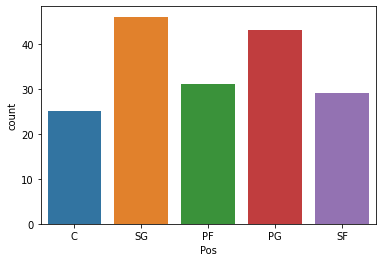

In [10]:
sns.countplot(new.Pos)
new.Pos.value_counts()

In [11]:
sum_new = pd.DataFrame(new.groupby('Pos').mean('PTS'))
mean_new = pd.DataFrame(new.groupby('Pos').mean('PTS'))
sum_new = sum_new.reset_index()
sum_new

,Pos,Age,G,3P%,2P%,eFG%,2PA,3PA,STL,AST,TOV,TRB,PTS
0,C,27.160000,62.280000,0.299400,0.606680,0.593640,9.184000,2.152000,0.780000,2.512000,1.836000,9.648000,16.264000
1,PF,26.870968,64.225806,0.351806,0.538161,0.543194,8.009677,4.316129,0.735484,2.574194,1.606452,6.109677,16.216129
2,PG,26.069767,59.348837,0.354674,0.485349,0.511023,7.969767,5.848837,1.090698,5.860465,2.395349,4.281395,16.986047
3,SF,25.689655,62.310345,0.361069,0.514241,0.528966,8.224138,5.651724,1.000000,3.020690,1.779310,4.803448,17.462069
4,SG,26.108696,59.021739,0.361565,0.500935,0.526130,6.639130,6.286957,0.919565,3.358696,1.680435,3.832609,15.493478


In [12]:
mean_new = mean_new.reset_index()
mean_new

,Pos,Age,G,3P%,2P%,eFG%,2PA,3PA,STL,AST,TOV,TRB,PTS
0,C,27.160000,62.280000,0.299400,0.606680,0.593640,9.184000,2.152000,0.780000,2.512000,1.836000,9.648000,16.264000
1,PF,26.870968,64.225806,0.351806,0.538161,0.543194,8.009677,4.316129,0.735484,2.574194,1.606452,6.109677,16.216129
2,PG,26.069767,59.348837,0.354674,0.485349,0.511023,7.969767,5.848837,1.090698,5.860465,2.395349,4.281395,16.986047
3,SF,25.689655,62.310345,0.361069,0.514241,0.528966,8.224138,5.651724,1.000000,3.020690,1.779310,4.803448,17.462069
4,SG,26.108696,59.021739,0.361565,0.500935,0.526130,6.639130,6.286957,0.919565,3.358696,1.680435,3.832609,15.493478


In [13]:
X = new.iloc[:, 1:]
y = new.iloc[:, :1]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [15]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()

In [16]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test, average ='macro'))
print(recall_score(pred, y_test, average ='macro'))
print(f1_score(pred, y_test, average ='macro'))

0.1509433962264151
0.21666666666666665
0.22800000000000004
0.07989203778677463


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
model = SGDClassifier(loss='log')

model.fit(X_train,y_train)
pred = model.predict(X_test)

accuracy_score(pred, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.32075471698113206

In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.24      , 0.625     , 0.45833333, 0.33333333, 0.20833333])

In [20]:
print(precision_score(pred, y_test,average='macro'))
print(recall_score(pred, y_test,average='macro'))
print(f1_score(pred, y_test,average='macro'))

0.34285714285714286
0.17833333333333332
0.21754385964912282


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Data visualizations for the project with some useful insights:

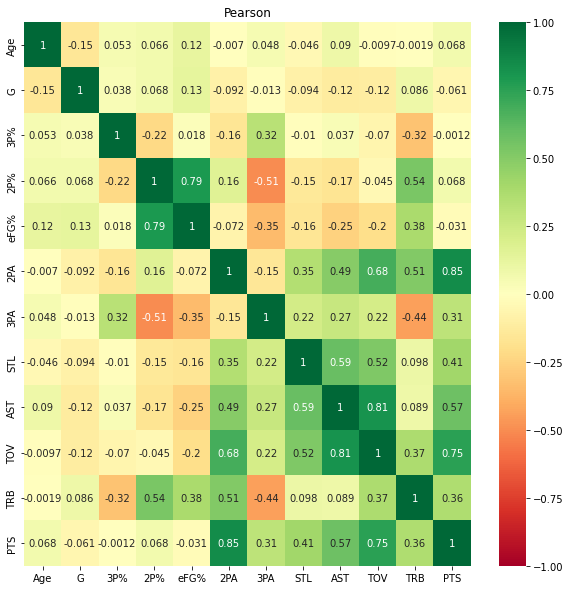

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
corrPearson = new.corr(method="pearson")
figure = plt.figure(figsize=(10,10))
sns.heatmap(corrPearson,annot=True, cmap='RdYlGn', vmin=-1)
plt.title("Pearson")
plt.show()

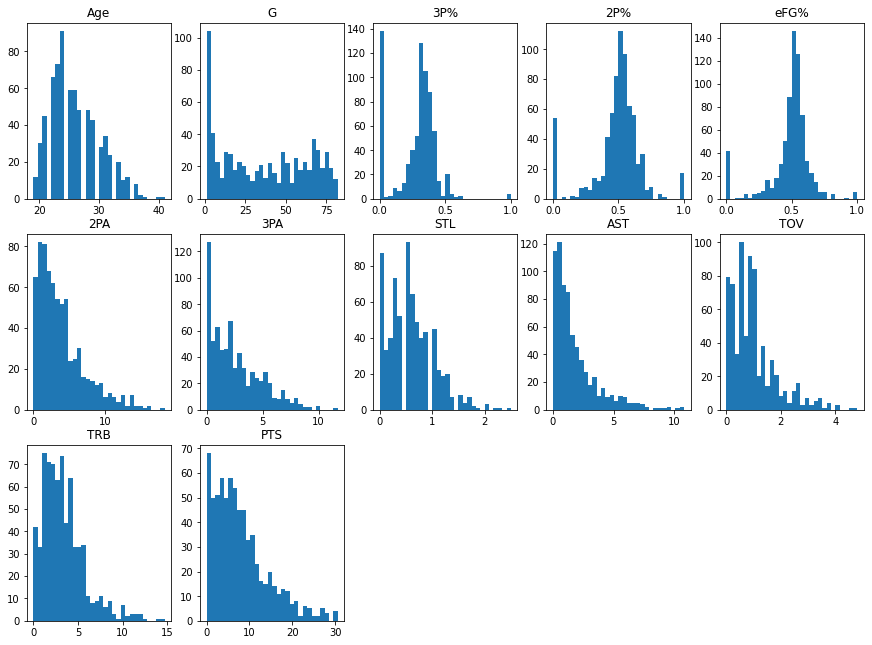

In [22]:
# histogram for the new dataset to see the averages 
cols = list(mean_new.iloc[:,1:])
fig = plt.figure(figsize=(15, 11))
fig.tight_layout(pad=5.0)

for i in range(len(cols)):
    plt.subplot(3, 5, i+1)
    plt.hist(data_drop2[cols[i]], bins=30)
    plt.title(cols[i])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


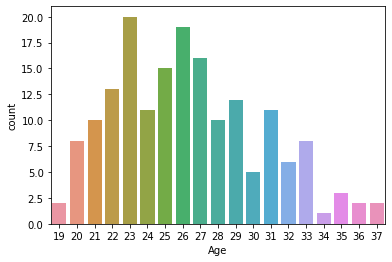

In [23]:
# distribution of age for the new observed dataset
sns.countplot(new['Age'], label='Count');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Age vs Points per game')

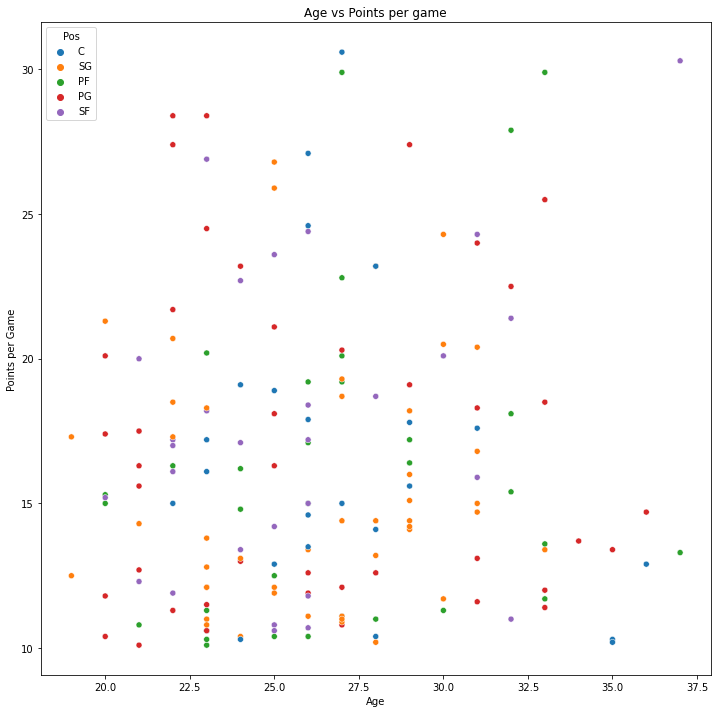

In [24]:
# age vs points distribution per single position

plt.figure(figsize=(12,12))
sns.scatterplot('Age','PTS',hue='Pos',data=new)
plt.xlabel('Age')
plt.ylabel('Points per Game')
plt.title('Age vs Points per game')

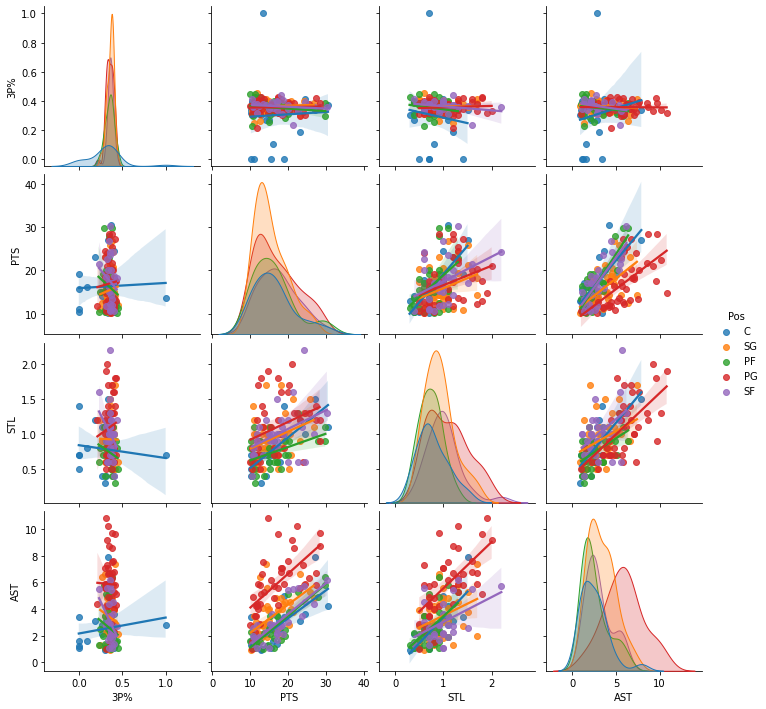

In [25]:
sns.pairplot(new, hue='Pos', vars=['3P%', 'PTS', 'STL', 'AST'], kind='reg')
plt.show()